## 피마 인디언의 당뇨병 예측 실행

In [1]:
import pandas as pd
#df = pd.read_csv('../dataset/pima-indians-diabetes.csv', header=None)
df = pd.read_csv('../dataset/pima-indians-diabetes.csv', 
                 names=["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
print(df.head())
print(df.info())
print(df.describe())

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null

In [2]:
df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [3]:
pregnant_df = df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True)
pregnant_df.head()

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235


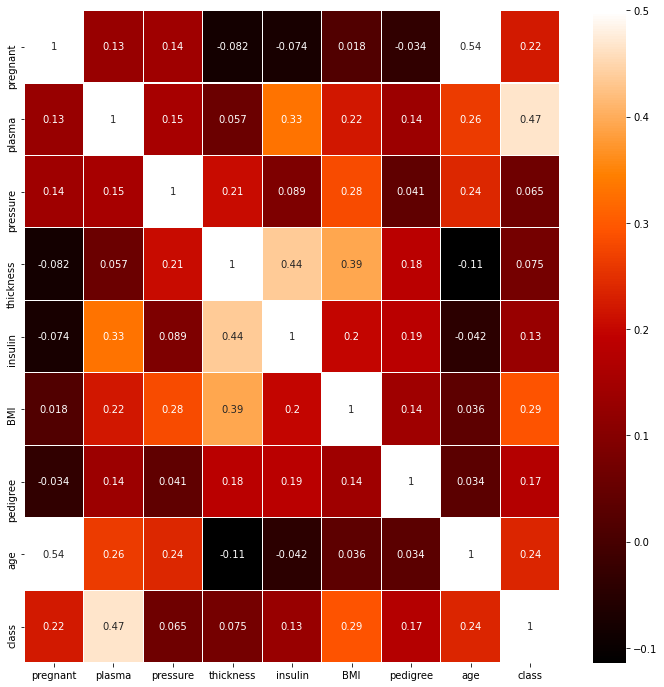

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

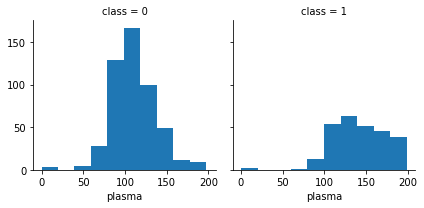

In [5]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
print(tf.__version__)

# seed 값 생성
np.random.seed(3)
tf.random.set_seed(3)

X = df.drop(['class'], axis=1, inplace=False).values
Y = df[['class']].values

2.1.0


In [ ]:
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(12, input_shape=(8,), activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    optimizer = tf.keras.optimizers.Adam(1e-4)
    #optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model
    
modell = build_model()


# 파일 이름에 에포크 번호를 포함시킵니다(`str.format` 포맷)
checkpoint_path = "training_tf/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


# 열 번째 에포크마다 가중치를 저장하기 위한 콜백을 만듭니다



cp_callback = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50, baseline=0.4),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path, 
        monitor='val_loss',
        #mode='min',        
        verbose=1, # verbosity mode, 0 or 1.
        save_best_only=True,
        save_weights_only=True,    
        save_freq='epoch')
]

In [22]:
'''
# 딥러닝 구조를 결정(모델을 설정하고 실행하는 부분)
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 딥러닝 실행
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
'''


def build_model():
    model = tf.keras.models.Sequential([
        #tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        tf.keras.layers.Dense(30, input_dim=17, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),        
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['accuracy', 'mae', 'mse'])
    return model


model = build_model()


'''
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 모델의 가중치를 저장하는 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
'''

# 파일 이름에 에포크 번호를 포함시킵니다(`str.format` 포맷)
checkpoint_path = "training_tf/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


# 열 번째 에포크마다 가중치를 저장하기 위한 콜백을 만듭니다



cp_callback = [
  #  tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50, baseline=0.4),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path, 
        monitor='val_loss',
       # mode='min',        
        verbose=1, # verbosity mode, 0 or 1.
       # save_best_only=True,
        save_weights_only=True,    
        #save_freq='epoch',
        period=50)
]

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(X, Y, 
                    validation_split=0.2,
                    #validation_data=(X, Y),
                    epochs=300,
                    batch_size=64,
                    verbose=1,  # Verbosity mode. 0 = silent, 1 = progress bar(default), 2 = one line per epoch. 
                    callbacks=cp_callback
                   )

Train on 376 samples, validate on 94 samples
Epoch 1/300
376/376 [==============================] - 0s 159us/sample - loss: 0.0931 - accuracy: 0.8910 - mae: 0.1883 - mse: 0.0931 - val_loss: 0.1472 - val_accuracy: 0.8298 - val_mae: 0.2079 - val_mse: 0.1472
Epoch 2/300
376/376 [==============================] - 0s 106us/sample - loss: 0.0902 - accuracy: 0.8883 - mae: 0.1909 - mse: 0.0902 - val_loss: 0.1487 - val_accuracy: 0.8298 - val_mae: 0.1953 - val_mse: 0.1487
Epoch 3/300
376/376 [==============================] - 0s 122us/sample - loss: 0.0948 - accuracy: 0.8910 - mae: 0.1843 - mse: 0.0948 - val_loss: 0.1530 - val_accuracy: 0.8298 - val_mae: 0.1814 - val_mse: 0.1530
Epoch 4/300
376/376 [==============================] - 0s 120us/sample - loss: 0.0935 - accuracy: 0.8803 - mae: 0.1852 - mse: 0.0935 - val_loss: 0.1518 - val_accuracy: 0.8298 - val_mae: 0.1885 - val_mse: 0.1518
Epoch 5/300
376/376 [==============================] - 0s 125us/sample - loss: 0.0937 - accuracy: 0.8910 - mae:

In [29]:
'''Weight들만 저장하기'''
model.save_weights('./checkpoints_tf/my_checkpoint') # 수동으로 가중치 저장하기

'''모델 전체 저장하기'''
path = "./saved_model_tf"
if not os.path.isdir(path):
    os.mkdir(path)
model.save(path) # 전체 모델 저장하기

INFO:tensorflow:Assets written to: ./saved_model_tf\assets


In [30]:
'''모델 전체 불러오기'''
new_model = tf.keras.models.load_model('./saved_model_tf') # 전체 모델 불러오기

# 모델 구조를 확인합니다
new_model.summary()

# 복원된 모델을 평가합니다
loss, acc, mae, mse= new_model.evaluate(X,  Y, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

print(new_model.predict(X).shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________
470/470 - 0s - loss: 0.0966 - accuracy: 0.8915 - mae: 0.1880 - mse: 0.0966
복원된 모델의 정확도: 89.15%
(470, 1)


In [31]:
'''모델 weight 불러오기'''
checkpoint_path = "training_tf/cp-0300.ckpt"
# checkpoint_path = './checkpoints/my_checkpoint'
model.load_weights(checkpoint_path) # 

loss, acc, mae, mse = model.evaluate(X, Y, verbose=2)
print(loss)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

print(model.predict(X).shape)

470/470 - 0s - loss: 0.0966 - accuracy: 0.8915 - mae: 0.1880 - mse: 0.0966
0.0966472824837299
복원된 모델의 정확도: 89.15%
(470, 1)
